<a href="https://colab.research.google.com/github/akashkhanvilkar/Portfolio_2/blob/main/De_Bruyne_Vs_Fernandes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Kevin De Bruyne Vs Bruno Fernandes - An Analytical Debate**

Steps Followed:


1.   Get data from Understat for Messi and Ronaldo
2.   Data Cleaning and Exploration of the data for Messi and Ronaldo on different aspects
3.   Comparative Analysis
4.   Shot Analysis
5.   The Final comparison



In [151]:
# Import required libraries:
import json
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
from sklearn.preprocessing import MinMaxScaler

# Import plotting libraries:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.patches import Arc
from plotly.subplots import make_subplots

# ***Getting the Data***

 **Kevin De Bruyne:**

1. *Season-wise data*

In [152]:
# Scrape Kevin player stats:
kevin_scrape_url = 'https://understat.com/player/447'
page_connect = urlopen(kevin_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

kevin_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
kevin_season_wise_meta_df.insert(0, "Player", "Kevin")

In [153]:
# Taking data of 2019/2020 and 2020/2021 season only
kevin_season_wise_meta_df = kevin_season_wise_meta_df[0:2]
kevin_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Kevin,AMC,25,6,81,2008,9.98343913257122,12,10.9582067001611,79,2020,Manchester City,1,0,4,7.699932523071766,22.51689299941063,11.297133274376392
1,Kevin,MC,35,14,100,2818,8.106427835300565,20,20.62070693448186,133,2019,Manchester City,3,0,12,6.58409016020596,37.79831072688103,19.244823712855577


2. *Shot Data*

In [154]:
# Scrape Kevin shot data:
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

Kevin_shots_df = pd.json_normalize(json.loads(json_data))
Kevin_shots_df.insert(0, "Player", "Kevin")

In [155]:
Kevin_shots_df = Kevin_shots_df.loc[Kevin_shots_df['date'] > '2019-08-09 00:00:00']
Kevin_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
359,Kevin,309927,37,SavedShot,0.855,0.67,0.04848058521747589,Kevin De Bruyne,a,447,OpenPlay,2019,RightFoot,11644,West Ham,Manchester City,0,5,2019-08-10 12:30:00,David Silva,Pass
360,Kevin,310769,7,SavedShot,0.8490000152587891,0.3139999961853027,0.04190467670559883,Kevin De Bruyne,h,447,OpenPlay,2019,LeftFoot,11659,Manchester City,Tottenham,2,2,2019-08-17 17:30:00,Rodri,Pass
361,Kevin,310777,35,MissedShots,0.9269999694824219,0.3160000038146973,0.09939402341842651,Kevin De Bruyne,h,447,OpenPlay,2019,RightFoot,11659,Manchester City,Tottenham,2,2,2019-08-17 17:30:00,None,TakeOn
362,Kevin,310781,47,BlockedShot,0.8130000305175781,0.4879999923706055,0.07166443020105362,Kevin De Bruyne,h,447,OpenPlay,2019,RightFoot,11659,Manchester City,Tottenham,2,2,2019-08-17 17:30:00,Kyle Walker,Pass
363,Kevin,310783,50,MissedShots,0.815,0.35700000762939454,0.05307205021381378,Kevin De Bruyne,h,447,OpenPlay,2019,LeftFoot,11659,Manchester City,Tottenham,2,2,2019-08-17 17:30:00,Sergio Agüero,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Kevin,409512,58,Goal,0.8619999694824219,0.4979999923706055,0.47196459770202637,Kevin De Bruyne,h,447,OpenPlay,2020,RightFoot,14761,Manchester City,Southampton,5,2,2021-03-10 18:00:00,Phil Foden,Pass
536,Kevin,412756,22,ShotOnPost,0.7830000305175782,0.6630000305175782,0.06745599955320358,Kevin De Bruyne,a,447,DirectFreekick,2020,RightFoot,14730,Leicester,Manchester City,0,2,2021-04-03 16:30:00,None,Standard
537,Kevin,412759,41,MissedShots,0.754000015258789,0.5059999847412109,0.02264893800020218,Kevin De Bruyne,a,447,OpenPlay,2020,RightFoot,14730,Leicester,Manchester City,0,2,2021-04-03 16:30:00,Rodri,Pass
538,Kevin,424074,10,Goal,0.7680000305175781,0.62,0.02420051582157612,Kevin De Bruyne,h,447,OpenPlay,2020,RightFoot,14811,Manchester City,Everton,5,0,2021-05-23 15:00:00,Riyad Mahrez,Pass


 **Bruno Fernandes:**

1. *Season-wise data*

In [156]:
# Scrape Bruno player stats:
Bruno_scrape_url = 'https://understat.com/player/1228'
page_connect = urlopen(Bruno_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

Bruno_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
Bruno_season_wise_meta_df.insert(0, "Player", "Bruno")

In [157]:
# Taking data of 2019/2020 and 2020/2021 season only
Bruno_season_wise_meta_df = Bruno_season_wise_meta_df[0:2]
Bruno_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Bruno,AMC,37,18,121,3117,16.0194544615224,12,11.474995978176594,95,2020,Manchester United,6,0,9,8.40783962700516,26.911412378773093,11.93228487111628
1,Bruno,AMC,14,8,44,1211,5.986080504953861,7,2.755000274628401,30,2019,Manchester United,2,0,4,2.9414419010281563,8.513760548084974,4.86424545198679


2. *Shot Data*

In [158]:
# Scrape Kevin shot data:
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

Bruno_shots_df = pd.json_normalize(json.loads(json_data))
Bruno_shots_df.insert(0, "Player", "Bruno")

In [159]:
Bruno_shots_df = Bruno_shots_df.loc[Bruno_shots_df['date'] > '2019-08-09 00:00:00']
Bruno_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
156,Bruno,352577,32,MissedShots,0.7609999847412109,0.21299999237060546,0.01028718426823616,Bruno Fernandes,h,1228,OpenPlay,2019,RightFoot,11888,Manchester United,Wolverhampton Wanderers,0,0,2020-02-01 17:30:00,Victor Lindelöf,HeadPass
157,Bruno,352580,39,BlockedShot,0.7859999847412109,0.5820000076293945,0.02600577287375927,Bruno Fernandes,h,1228,OpenPlay,2019,RightFoot,11888,Manchester United,Wolverhampton Wanderers,0,0,2020-02-01 17:30:00,Anthony Martial,Pass
158,Bruno,352579,39,SavedShot,0.8130000305175781,0.46900001525878904,0.05104486271739006,Bruno Fernandes,h,1228,OpenPlay,2019,RightFoot,11888,Manchester United,Wolverhampton Wanderers,0,0,2020-02-01 17:30:00,None,None
159,Bruno,352582,57,SavedShot,0.7240000152587891,0.5220000076293946,0.04823361709713936,Bruno Fernandes,h,1228,DirectFreekick,2019,RightFoot,11888,Manchester United,Wolverhampton Wanderers,0,0,2020-02-01 17:30:00,None,Standard
160,Bruno,352586,67,SavedShot,0.7290000152587891,0.38599998474121094,0.020461397245526314,Bruno Fernandes,h,1228,OpenPlay,2019,RightFoot,11888,Manchester United,Wolverhampton Wanderers,0,0,2020-02-01 17:30:00,Harry Maguire,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,Bruno,423111,42,SavedShot,0.7430000305175781,0.4540000152587891,0.016029518097639084,Bruno Fernandes,h,1228,FromCorner,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,None
317,Bruno,423114,51,MissedShots,0.7330000305175781,0.4809999847412109,0.05328523367643356,Bruno Fernandes,h,1228,DirectFreekick,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,Standard
318,Bruno,423120,66,SavedShot,0.919000015258789,0.8080000305175781,0.06730871647596359,Bruno Fernandes,h,1228,DirectFreekick,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,Standard
319,Bruno,423122,73,MissedShots,0.855,0.27100000381469724,0.043396566063165665,Bruno Fernandes,h,1228,OpenPlay,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,None


# **Build Final Season-level and shots data**

**Joint Season-wise Data**

In [160]:
season_wise_meta_df = kevin_season_wise_meta_df.append(Bruno_season_wise_meta_df)
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Kevin,AMC,25,6,81,2008,9.98343913257122,12,10.9582067001611,79,2020,Manchester City,1,0,4,7.699932523071766,22.51689299941063,11.297133274376392
1,Kevin,MC,35,14,100,2818,8.106427835300565,20,20.62070693448186,133,2019,Manchester City,3,0,12,6.58409016020596,37.79831072688103,19.244823712855577
0,Bruno,AMC,37,18,121,3117,16.0194544615224,12,11.474995978176594,95,2020,Manchester United,6,0,9,8.40783962700516,26.911412378773093,11.93228487111628
1,Bruno,AMC,14,8,44,1211,5.986080504953861,7,2.755000274628401,30,2019,Manchester United,2,0,4,2.9414419010281563,8.513760548084974,4.86424545198679


**Joint Shots Data**

In [161]:
shots_df = Kevin_shots_df.append(Bruno_shots_df)
shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
359,Kevin,309927,37,SavedShot,0.855,0.67,0.04848058521747589,Kevin De Bruyne,a,447,OpenPlay,2019,RightFoot,11644,West Ham,Manchester City,0,5,2019-08-10 12:30:00,David Silva,Pass
360,Kevin,310769,7,SavedShot,0.8490000152587891,0.3139999961853027,0.04190467670559883,Kevin De Bruyne,h,447,OpenPlay,2019,LeftFoot,11659,Manchester City,Tottenham,2,2,2019-08-17 17:30:00,Rodri,Pass
361,Kevin,310777,35,MissedShots,0.9269999694824219,0.3160000038146973,0.09939402341842651,Kevin De Bruyne,h,447,OpenPlay,2019,RightFoot,11659,Manchester City,Tottenham,2,2,2019-08-17 17:30:00,None,TakeOn
362,Kevin,310781,47,BlockedShot,0.8130000305175781,0.4879999923706055,0.07166443020105362,Kevin De Bruyne,h,447,OpenPlay,2019,RightFoot,11659,Manchester City,Tottenham,2,2,2019-08-17 17:30:00,Kyle Walker,Pass
363,Kevin,310783,50,MissedShots,0.815,0.35700000762939454,0.05307205021381378,Kevin De Bruyne,h,447,OpenPlay,2019,LeftFoot,11659,Manchester City,Tottenham,2,2,2019-08-17 17:30:00,Sergio Agüero,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,Bruno,423111,42,SavedShot,0.7430000305175781,0.4540000152587891,0.016029518097639084,Bruno Fernandes,h,1228,FromCorner,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,None
317,Bruno,423114,51,MissedShots,0.7330000305175781,0.4809999847412109,0.05328523367643356,Bruno Fernandes,h,1228,DirectFreekick,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,Standard
318,Bruno,423120,66,SavedShot,0.919000015258789,0.8080000305175781,0.06730871647596359,Bruno Fernandes,h,1228,DirectFreekick,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,Standard
319,Bruno,423122,73,MissedShots,0.855,0.27100000381469724,0.043396566063165665,Bruno Fernandes,h,1228,OpenPlay,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,None


# **Data Cleaning and EDA**

**On Season-wise data**

*Numerical EDA*

In [162]:
season_wise_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 1
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Player      4 non-null      object
 1   position    4 non-null      object
 2   games       4 non-null      object
 3   goals       4 non-null      object
 4   shots       4 non-null      object
 5   time        4 non-null      object
 6   xG          4 non-null      object
 7   assists     4 non-null      object
 8   xA          4 non-null      object
 9   key_passes  4 non-null      object
 10  season      4 non-null      object
 11  team        4 non-null      object
 12  yellow      4 non-null      object
 13  red         4 non-null      object
 14  npg         4 non-null      object
 15  npxG        4 non-null      object
 16  xGChain     4 non-null      object
 17  xGBuildup   4 non-null      object
dtypes: object(18)
memory usage: 608.0+ bytes


In [163]:
season_wise_meta_df = season_wise_meta_df.apply(pd.to_numeric, errors="ignore")

In [164]:
season_wise_meta_df = season_wise_meta_df.round(2)

In [ ]:
season_wise_meta_df.describe().round(1)

,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
count,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
mean,27.8,11.5,86.5,2288.5,10.0,12.8,11.5,84.2,2019.5,3.0,0.0,7.2,6.4,23.9,11.8
std,10.6,5.5,32.7,857.6,4.3,5.4,7.3,42.7,0.6,2.2,0.0,3.9,2.4,12.1,5.9
min,14.0,6.0,44.0,1211.0,6.0,7.0,2.8,30.0,2019.0,1.0,0.0,4.0,2.9,8.5,4.9
25%,22.2,7.5,71.8,1808.8,7.6,10.8,8.9,66.8,2019.0,1.8,0.0,4.0,5.7,19.0,9.7
50%,30.0,11.0,90.5,2413.0,9.0,12.0,11.2,87.0,2019.5,2.5,0.0,6.5,7.1,24.7,11.6
75%,35.5,15.0,105.2,2892.8,11.5,14.0,13.8,104.5,2020.0,3.8,0.0,9.8,7.9,29.6,13.8
max,37.0,18.0,121.0,3117.0,16.0,20.0,20.6,133.0,2020.0,6.0,0.0,12.0,8.4,37.8,19.2


In [ ]:
season_wise_meta_df.groupby(["Player"]).describe().round(1)

games                                ... xGBuildup                              
       count  mean   std   min   25%   50%  ...       std   min   25%   50%   75%   max
Player                                      ...                                        
Bruno    2.0  25.5  16.3  14.0  19.8  25.5  ...       5.0   4.9   6.6   8.4  10.2  11.9
Kevin    2.0  30.0   7.1  25.0  27.5  30.0  ...       5.6  11.3  13.3  15.3  17.3  19.2

[2 rows x 120 columns]

In [ ]:
season_wise_meta_df.groupby(["Player", "team"])["goals"].sum()

Player  team             
Bruno   Manchester United    26
Kevin   Manchester City      20
Name: goals, dtype: int64

*Visual EDA*

In [ ]:
num_cols = season_wise_meta_df.select_dtypes(exclude=[object]).columns
num_cols

Index(['games', 'goals', 'shots', 'time', 'xG', 'assists', 'xA', 'key_passes',
       'season', 'yellow', 'red', 'npg', 'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')

In [ ]:
num_cols.__len__()

15

In [ ]:
season_wise_meta_df.groupby(["Player"])[num_cols].sum()

,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
Player,,,,,,,,,,,,,,,
Bruno,51,26,165,4328,22.01,19,14.23,125,4039,8,0,13,11.35,35.42,16.79
Kevin,60,20,181,4826,18.09,32,31.58,212,4039,4,0,16,14.28,60.32,30.54


In [ ]:
total_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().round(1).reset_index()

*EDA on Totals (Consolidated data for all seasons per player)*

In [ ]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=4, cols=4,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=num_cols)
# Add bar plot for goals conceded in all subplots:
for col in num_cols:
    fig.add_trace(go.Bar(x=total_df["Player"],
                        y=total_df[col],
                        text=total_df[col],
                        textposition="inside",
                        name=col),
                row=i, col=j)
    j += 1
    if j > 4:
        j = 1
        i += 1
    if i > 4:
        i = 1
fig.update_layout(height=800)
fig.show()

NOTE: On xGChain and xGBuildup
xGChain --> Calculating xG for possessions that lead to a shot where the player was involved at least once in that possession, INCLUDING the final pass or the shot.
xGBuildup --> Calculating xG for possessions that lead to a shot where the player was involved at least once in that possession, EXCLUDING the final pass or the shot.

**On Shots data**

*Numerical EDA*

In [ ]:
shots_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 427 to 320
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Player           278 non-null    object
 1   id               278 non-null    object
 2   minute           278 non-null    object
 3   result           278 non-null    object
 4   X                278 non-null    object
 5   Y                278 non-null    object
 6   xG               278 non-null    object
 7   player           278 non-null    object
 8   h_a              278 non-null    object
 9   player_id        278 non-null    object
 10  situation        278 non-null    object
 11  season           278 non-null    object
 12  shotType         278 non-null    object
 13  match_id         278 non-null    object
 14  h_team           278 non-null    object
 15  a_team           278 non-null    object
 16  h_goals          278 non-null    object
 17  a_goals          278 non-null    

In [172]:
shots_df = shots_df.apply(pd.to_numeric, errors="ignore")
shots_df = shots_df.round(2)
shots_df.describe().round(1)


,id,minute,X,Y,xG,player_id,season,match_id,h_goals,a_goals
count,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0
mean,377770.2,47.9,0.8,0.5,0.1,819.4,2019.6,13446.9,1.8,1.3
std,29224.9,25.1,0.1,0.1,0.2,390.6,0.5,1348.8,1.8,1.3
min,309927.0,1.0,0.7,0.0,0.0,447.0,2019.0,11644.0,0.0,0.0
25%,353137.8,28.0,0.8,0.4,0.0,447.0,2019.0,11911.5,1.0,0.0
50%,385533.5,49.0,0.8,0.5,0.0,447.0,2020.0,14491.0,1.0,1.0
75%,399535.2,67.8,0.9,0.6,0.1,1228.0,2020.0,14614.0,2.0,2.0
max,424077.0,99.0,1.0,0.9,0.8,1228.0,2020.0,14811.0,9.0,6.0


In [ ]:
shots_df.groupby(["Player"]).describe().round(1)

id                                         ... a_goals                    
        count      mean      std       min       25%  ...     min  25%  50%  75%  max
Player                                                ...                            
Bruno   165.0  390822.9  21031.3  352577.0  373256.0  ...     0.0  0.0  1.0  3.0  6.0
Kevin   113.0  386346.0  17069.8  352628.0  372995.0  ...     0.0  0.0  1.0  1.0  5.0

[2 rows x 80 columns]

*Visual EDA*

In [173]:
shots_df.head()

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
359,Kevin,309927,37,SavedShot,0.86,0.67,0.05,Kevin De Bruyne,a,447,OpenPlay,2019,RightFoot,11644,West Ham,Manchester City,0,5,2019-08-10 12:30:00,David Silva,Pass
360,Kevin,310769,7,SavedShot,0.85,0.31,0.04,Kevin De Bruyne,h,447,OpenPlay,2019,LeftFoot,11659,Manchester City,Tottenham,2,2,2019-08-17 17:30:00,Rodri,Pass
361,Kevin,310777,35,MissedShots,0.93,0.32,0.10,Kevin De Bruyne,h,447,OpenPlay,2019,RightFoot,11659,Manchester City,Tottenham,2,2,2019-08-17 17:30:00,None,TakeOn
362,Kevin,310781,47,BlockedShot,0.81,0.49,0.07,Kevin De Bruyne,h,447,OpenPlay,2019,RightFoot,11659,Manchester City,Tottenham,2,2,2019-08-17 17:30:00,Kyle Walker,Pass
363,Kevin,310783,50,MissedShots,0.82,0.36,0.05,Kevin De Bruyne,h,447,OpenPlay,2019,LeftFoot,11659,Manchester City,Tottenham,2,2,2019-08-17 17:30:00,Sergio Agüero,Pass


In [174]:
px.histogram(data_frame=shots_df, x="result", color="Player",
             barmode="group", title="Shot Result Comparison",
             labels={"result": "", "count": ""})

In [175]:
px.histogram(data_frame=shots_df, x="situation", color="Player",
             barmode="group", title="Shot Play-Pattern Comparison",
             labels={"situation": "", "count": ""})

In [176]:
px.histogram(data_frame=shots_df, x="player_assisted", color="Player",
             barmode="group", title="Assisting Player Comparison",
             labels={"result": "", "count": ""})

In [177]:
px.histogram(data_frame=shots_df, x="h_a", color="Player",
             barmode="group", title="Home-Away Comparison (Shots)",
             labels={"result": "", "count": ""})

# **Comparative Analysis**

**Total Goals vs Non-Penalty Goals (per season)**

In [178]:
fig = px.scatter(y="goals", x="npg", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["npg"].min(), season_wise_meta_df["npg"].max() + 5],
                         y=[season_wise_meta_df["goals"].mean(), season_wise_meta_df["goals"].mean()],
                         name="Avg. Goals"))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["npg"].mean(), season_wise_meta_df["npg"].mean()],
                         y=[season_wise_meta_df["goals"].min(), season_wise_meta_df["goals"].max() + 5],
                         name="Avg. npg"))
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

**Total Goals vs Total Assists (per season)**

In [179]:
fig = px.scatter(y="assists", x="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 opacity=.8)
fig.add_trace(go.Scatter(x=season_wise_meta_df["goals"],
                         y=[season_wise_meta_df["assists"].mean()]*len(season_wise_meta_df),
                         name="Avg. Assists",
                         marker={"size": .1}))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["goals"].mean()]*len(season_wise_meta_df),
                         y=season_wise_meta_df["assists"],
                         name="Avg. Goals",
                         marker={"size": .1}))
fig.update_traces(textposition='top center',
                  textfont_size=10,
                  marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

**Total xGChain vs Total xGBuildup (per season)**

In [180]:
fig = px.scatter(x="xGChain", y="xGBuildup", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 opacity=.8)
fig.add_trace(go.Scatter(x=season_wise_meta_df["xGChain"],
                         y=[season_wise_meta_df["xGBuildup"].mean()]*len(season_wise_meta_df),
                         name="Avg. xGBuildup",
                         marker={"size": .1}))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["xGChain"].mean()]*len(season_wise_meta_df),
                         y=season_wise_meta_df["xGBuildup"],
                         name="Avg. xGChain",
                         marker={"size": .1}))

fig.update_traces(textposition='top center',
                  textfont_size=10,
                  marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

# **Shot Analysis**

In [181]:
# Setting boundaries and midpoint:
x_lims = [0, 1.15]
y_lims = [0, 0.74]

x_mid = x_lims[1]/2
y_mid = y_lims[1]/2

# Setting color and linewidth:
background_color = "black"
line_color = "white"
line_width = 2.

In [182]:
#@title
def create_full_pitch(x_lims, y_lims, background_color="white", line_color="black", line_width=2.):
    """
    Function to create a full-scale pitch based on input dimensions
    :params:
    x_lims: min and max limits for the length of the field
    y_lims: min and max limits for the width/breadth of the field
    background_color: Background color of the field
    line_color: Color for all the lines in the field (Keep this color in contrast with background_color for optimal visual results)
    line_width: The thickness of the outer and center lines
    """
    # Create figure:
    fig = plt.figure(facecolor=background_color, figsize=(12, 7))
    ax = fig.add_subplot(111, facecolor=background_color)

    # Pitch Outline & Centre Line
    plt.plot([x_lims[0], x_lims[0]], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # left goal-line
    plt.plot([x_lims[0], x_lims[1]], [y_lims[1], y_lims[1]], linewidth=line_width, color=line_color)  # Upper side-line
    plt.plot([x_lims[1], x_lims[1]], [y_lims[1], y_lims[0]], linewidth=line_width, color=line_color)  # Right goal-line
    plt.plot([x_lims[1], x_lims[0]], [y_lims[0], y_lims[0]], linewidth=line_width, color=line_color)  # Lower side-line
    plt.plot([x_mid, x_mid], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # Center line

    # Left Penalty Area
    plt.plot([x_lims[0]+.18, x_lims[0]+.18], [y_mid - .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.18], [y_mid + .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.18], [y_mid - .22, y_mid - .22], color=line_color)

    # Right Penalty Area
    plt.plot([x_lims[1] - .18, x_lims[1] - .18], [y_mid - .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .18], [y_mid + .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .18], [y_mid - .22, y_mid - .22], color=line_color)

    # Left 6yd box Area
    plt.plot([x_lims[0]+.06, x_lims[0]+.06], [y_mid - .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.06], [y_mid + .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.06], [y_mid - .06, y_mid - .06], color=line_color)

    # # Right 6yd box Area
    plt.plot([x_lims[1] - .06, x_lims[1] - .06], [y_mid - .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .06], [y_mid + .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .06], [y_mid - .06, y_mid - .06], color=line_color)

    # Prepare Circles
    centre_circle = plt.Circle((x_mid, y_mid), .1, color=line_color, fill=False)
    centre_spot = plt.Circle((x_mid, y_mid), 0.005, color=line_color)
    left_pen_spot = plt.Circle((x_lims[0]+0.12, y_mid), 0.005, color=line_color)
    right_pen_spot = plt.Circle((x_lims[1] - 0.12, y_mid), 0.005, color=line_color)

    # Draw Circles
    ax.add_patch(centre_circle)
    ax.add_patch(centre_spot)
    ax.add_patch(left_pen_spot)
    ax.add_patch(right_pen_spot)

    # Prepare Arcs
    left_arc = Arc((x_lims[0] + .12, y_mid), height=.183, width=.183, angle=0, theta1=310, theta2=50, color=line_color)
    right_arc = Arc((x_lims[1] - .12, y_mid), height=.183, width=.183, angle=0, theta1=130, theta2=230, color=line_color)

    # Draw Arcs
    ax.add_patch(left_arc)
    ax.add_patch(right_arc)

    plt.axis("off")

    return ax

In [183]:
shots_df["X"] = shots_df["X"].multiply(x_lims[1])
shots_df["Y"] = shots_df["Y"].multiply(y_lims[1])

Plot Kevin De Bruyne shot map

(0.0, 0.74)

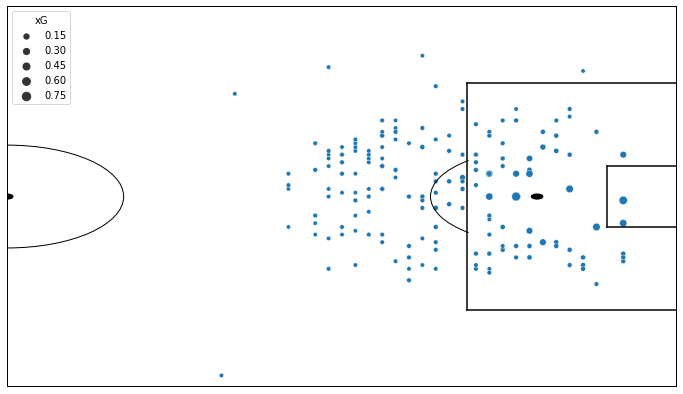

In [184]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.scatterplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Kevin"], size="xG", ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

Plot Bruno Fernandes shot map

(0.0, 0.74)

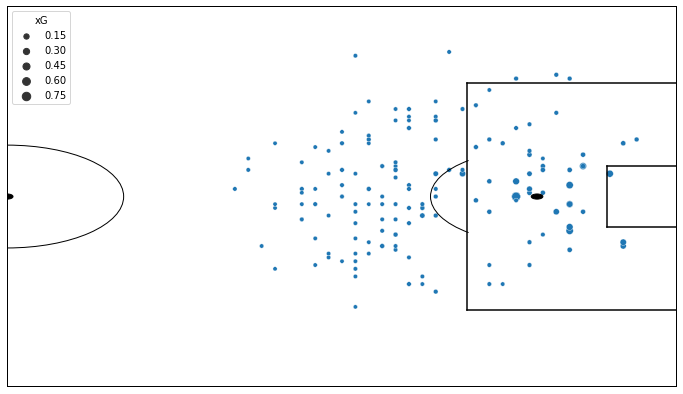

In [185]:
ax2 = create_full_pitch(x_lims, y_lims)

sns.scatterplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Bruno"], size="xG", ax=ax2)

ax2.set_xlim([x_mid, x_lims[1]])
ax2.set_ylim(y_lims)

# **Plot HeatMaps**

Kevin De Bruyne

(0.0, 0.74)

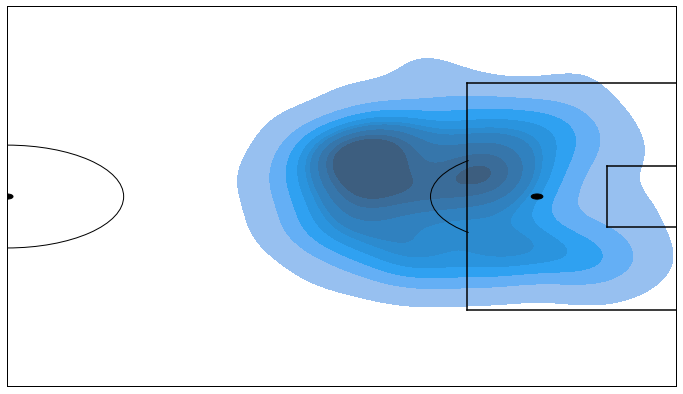

In [189]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.kdeplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Kevin"], shade=True, n_levels=10, ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

Bruno Fernandes

(0.0, 0.74)

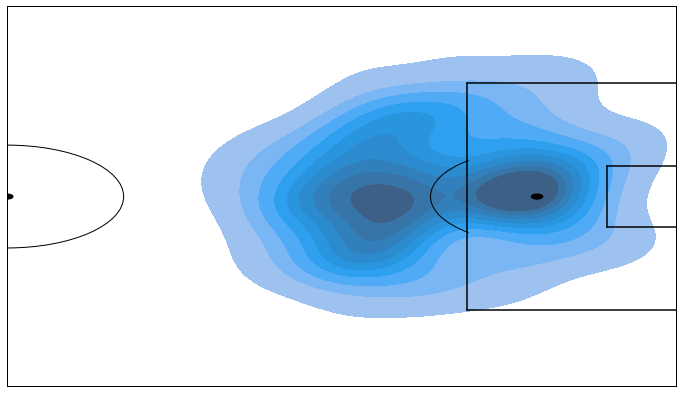

In [190]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.kdeplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Bruno"], shade=True, n_levels=10, ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

# **Per90 Stats**  

In [191]:
radar_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().reset_index()
radar_df

,Player,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
0,Bruno,51,26,165,4328,22.01,19,14.23,125,4039,8,0,13,11.35,35.42,16.79
1,Kevin,60,20,181,4826,18.09,32,31.58,212,4039,4,0,16,14.28,60.32,30.54


In [203]:
per90Cols = ['goals', 'shots', 'xG',
             'assists', 'xA', 'key_passes',
             'npg', 'npxG', 'xGChain', 'xGBuildup']

for col in per90Cols:
    radar_df[col + "Per90"] = radar_df[col].divide(radar_df["time"]).multiply(90)

In [204]:
cols_for_radar = [i + "Per90" for i in per90Cols]

In [205]:
radar_df[cols_for_radar]

,goalsPer90,shotsPer90,xGPer90,assistsPer90,xAPer90,key_passesPer90,npgPer90,npxGPer90,xGChainPer90,xGBuildupPer90
0,0.540665,3.431146,0.457694,0.395102,0.295910,2.599353,0.270333,0.236021,0.736553,0.349145
1,0.372980,3.375466,0.337360,0.596768,0.588935,3.953585,0.298384,0.266308,1.124907,0.569540


In [206]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Bruno"), cols_for_radar].sum(),
    theta=cols_for_radar,
    fill='toself',
    name='Bruno'))
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Kevin"), cols_for_radar].sum(),
    theta=cols_for_radar,
    fill='toself',
    name="Kevin"))
# Additional properties for the plot:
fig.update_layout(
    title="Bruno Fernandes vs Kevin De Bruyne",
polar=dict(
    radialaxis=dict(
    visible=True,
    )),
showlegend=True
)
fig.show()

In [208]:
#Normalisation
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
radar_df[cols_for_radar] = scalar.fit_transform(radar_df[cols_for_radar])
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Bruno"), cols_for_radar].sum(),
    theta=cols_for_radar,
    fill='toself',
    name='Bruno'))
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Kevin"), cols_for_radar].sum(),
    theta=cols_for_radar,
    fill='toself',
    name="Kevin"))
# Additional properties for the plot:
fig.update_layout(
    title="And the winner is...",
polar=dict(
    radialaxis=dict(
    visible=True,
    )),
showlegend=True
)
fig.show()

# **Conclusion** 

1. Bruno is a more potent goalscorer than De Bruyne. He has a higher goals, shots and xG per 90 than De Bruyne. However, when you take penalties out of the equation the stats are almost the same.
2. De Bruyne is more of a provider and has a higher number of assists per 90 than Bruno. He also beats Bruno comprehensively in terms of buildup, passes and chance creation.
3. The heat map suggests that Bruno takes a higher number shots around and inside the box compared to De Bruyne.
4. The two players Bruno links up quite well are Luke Shaw and Marcus Rashford. For De bruyne they are Riyad Mahrez and İlkay Gündoğan.